In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
from keras.optimizers import SGD

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [6]:
training_set = train_datagen.flow_from_directory('/Users/GGS/Desktop/25Nov18/ML/images_data/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 120 images belonging to 2 classes.


In [7]:
test_set = test_datagen.flow_from_directory('/Users/GGS/Desktop/25Nov18/ML/images_data/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 13 images belonging to 2 classes.


In [8]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 80,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 80)

Epoch 1/20
80/80 [==============================] - 36s 452ms/step - loss: 0.6444 - acc: 0.6853 - val_loss: 0.8370 - val_acc: 0.5385
Epoch 2/20
80/80 [==============================] - 35s 439ms/step - loss: 0.4378 - acc: 0.7249 - val_loss: 0.7083 - val_acc: 0.6923
Epoch 3/20
80/80 [==============================] - 31s 384ms/step - loss: 0.2839 - acc: 0.8913 - val_loss: 0.7674 - val_acc: 0.7692
Epoch 4/20
80/80 [==============================] - 31s 384ms/step - loss: 0.2447 - acc: 0.9440 - val_loss: 0.6999 - val_acc: 0.8462
Epoch 5/20
80/80 [==============================] - 31s 382ms/step - loss: 0.2114 - acc: 0.9686 - val_loss: 0.9183 - val_acc: 0.8462
Epoch 6/20
80/80 [==============================] - 32s 399ms/step - loss: 0.1926 - acc: 0.9764 - val_loss: 1.0214 - val_acc: 0.8462
Epoch 7/20
80/80 [==============================] - 31s 391ms/step - loss: 0.1758 - acc: 0.9855 - val_loss: 0.9789 - val_acc: 0.8462
Epoch 8/20
80/80 [==============================] - 39s 489ms/step - 

In [9]:
dir(classifier)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_base_init',
 '_build_input_shape',
 '_built',
 '_check_trainable_weights_consistency',
 '_collected_trainable_weights',
 '_compute_previous_mask',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_feed_loss_fns',
 '_feed_output_names',
 '_feed_output_shapes',
 '_feed_outputs',
 '_feed_sample_weight_modes',
 '_feed_sample_weights',
 '_feed_targets',
 '_function_kwargs',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_init_graph_network',
 '_init_subclassed_network',
 '_initial_weights',
 '_input_coordinates',
 '_input_layers',


In [10]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
__________

In [12]:
classifier.history.history

{'acc': [0.68541666626930242,
  0.72458333253860474,
  0.89166666706403097,
  0.94458333313465115,
  0.9683333331346512,
  0.97624999920527145,
  0.98541666607062017,
  0.99374999940395359,
  0.99666666607062027,
  0.99875000000000003,
  0.99750000000000005,
  0.99208333233992263,
  0.98541666646798454,
  0.99166666607062026,
  0.99666666646798452,
  0.99958333333333338,
  0.99875000000000003,
  0.98874999860922497,
  1.0,
  0.99666666646798452],
 'loss': [0.64376086751619976,
  0.43745348706841469,
  0.28296471854050953,
  0.24344857871532441,
  0.21034505801896256,
  0.19376596550146738,
  0.17408934091528258,
  0.16026388689875604,
  0.14848259910941125,
  0.13794279324511688,
  0.13099081452935935,
  0.044085319342557341,
  0.037786086726506858,
  0.02469898338439331,
  0.011967605390649018,
  0.0030601044151990207,
  0.0035540761355756937,
  0.030674627146339239,
  0.0026595811781104811,
  0.010638842072318463],
 'val_acc': [0.53846156597137451,
  0.69230771064758301,
  0.76923078

In [13]:
import pandas as pd

In [14]:
metrics_df = pd.DataFrame(classifier.history.history)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

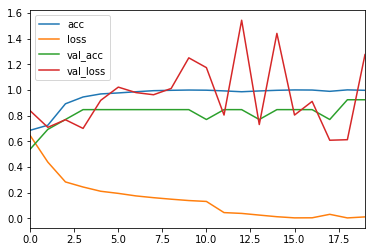

In [16]:
metrics_df.plot()

In [17]:
import numpy as np
from keras.preprocessing import image
test_image = \
    image.load_img('/Users/GGS/Desktop/25Nov18/ML/images_data/Test/ant/image_0039.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

In [18]:
print (result)

[[ 0.]]


In [19]:
test_image1 = \
    image.load_img('/Users/GGS/Desktop/25Nov18/ML/images_data/Test/butterfly/image_0085.jpg'
                   , target_size=(64, 64))
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis=0)
result1 = classifier.predict(test_image1)

In [20]:
print(result1)

[[ 1.]]
